In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import *
import photutils as ph
import numpy as np
import os.path
import csv
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import hstack
from astropy.nddata import CCDData
from astropy.coordinates import SkyCoord
from astropy.coordinates import SkyCoord
#from astropy.io.fits import HeaderDiff
import warnings

0 -


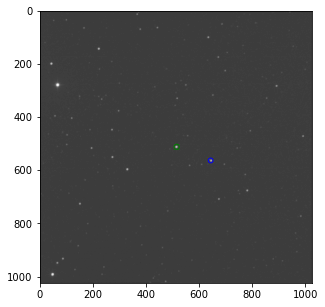

1 -


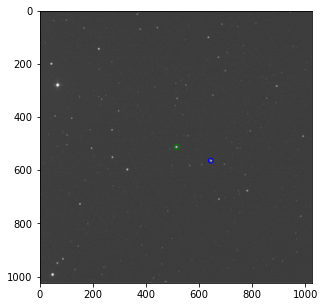

2 -


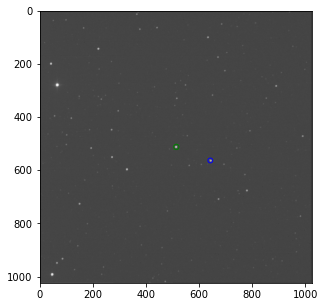

3 -


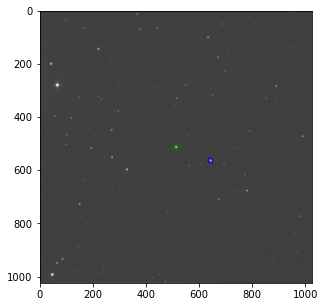

4 -


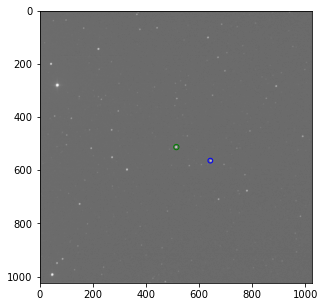

5 -


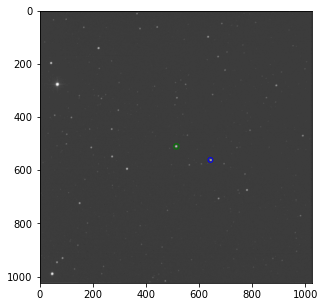

6 -


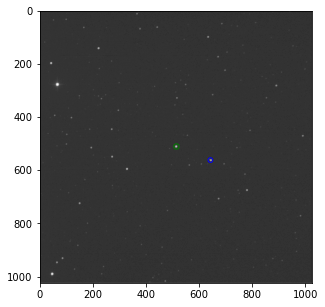

7 -


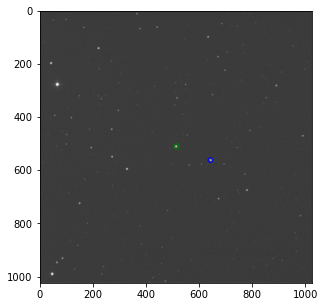

8 -


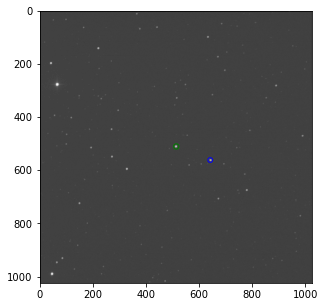

9 -


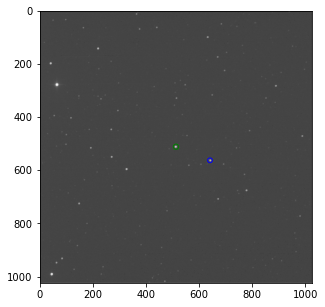

10 -


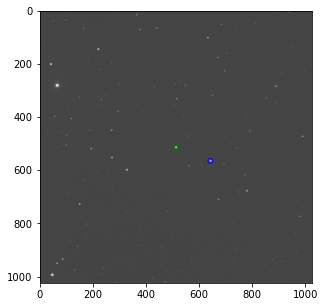

11 -


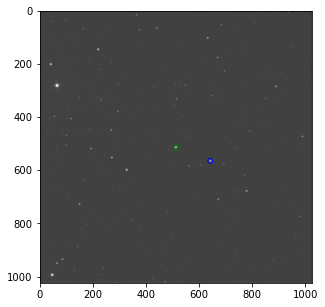

12 -


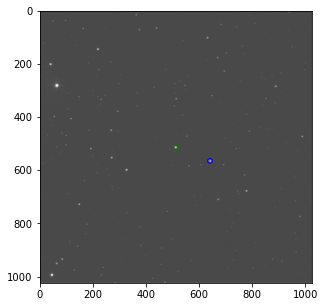

13 -


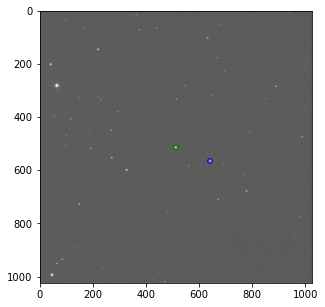

14 -


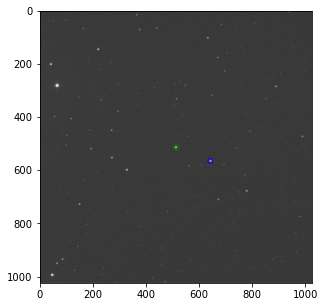

15 -


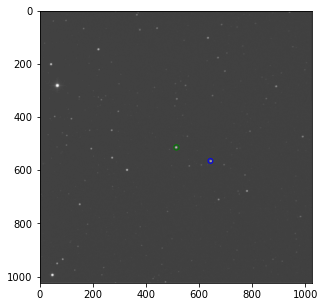

16 -


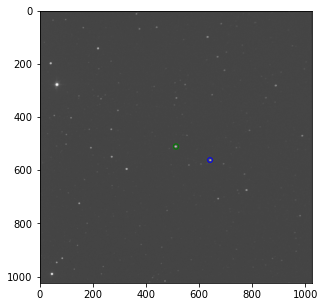

17 -


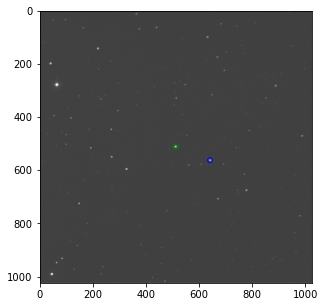

18 -


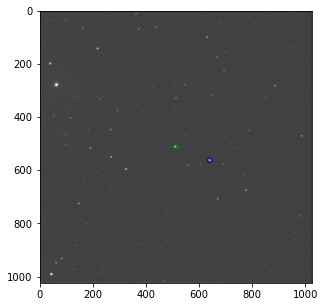

19 -


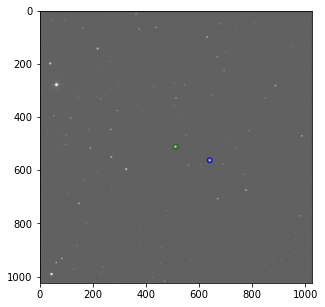

20 -


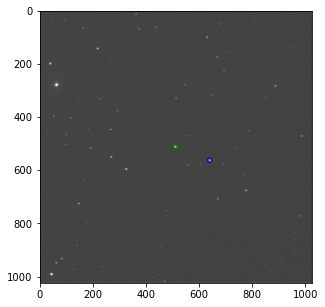

21 -


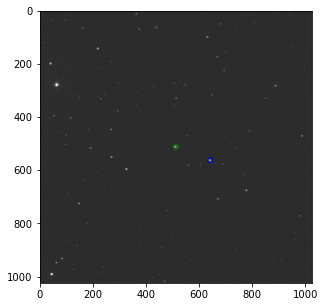

22 -


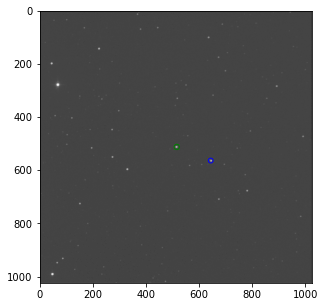

23 -


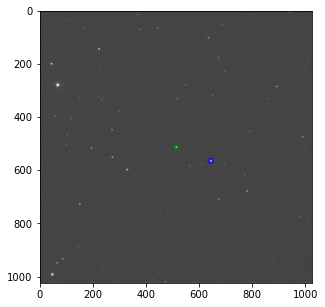

24 -


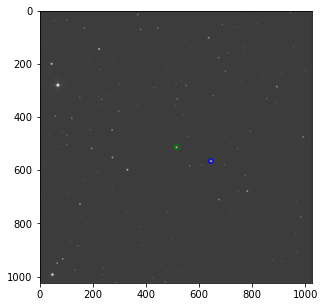

25 -


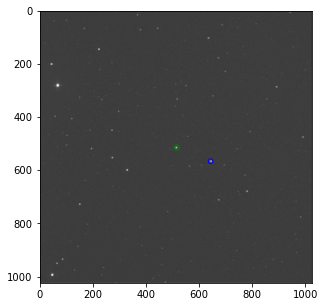

26 -


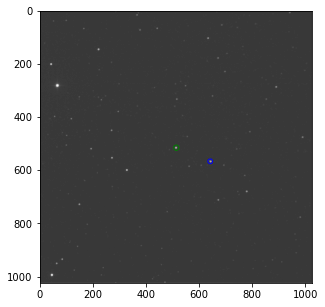

27 -


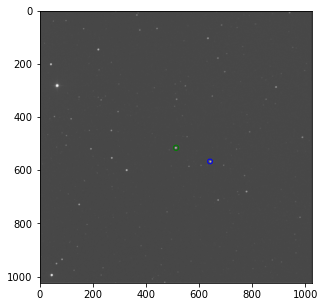

28 -


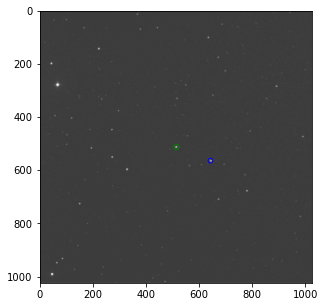

29 -


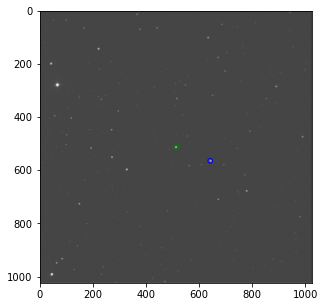

30 -


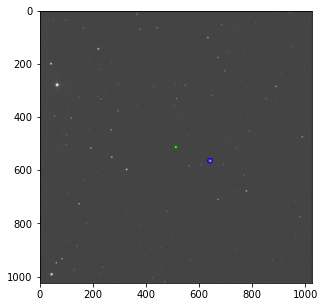

31 -


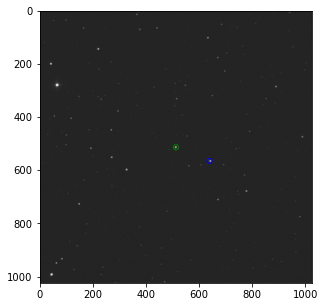

32 -


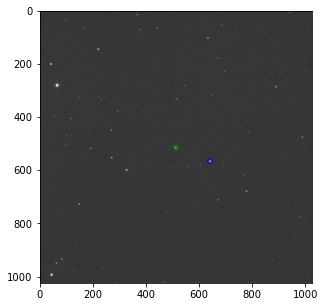

33 -


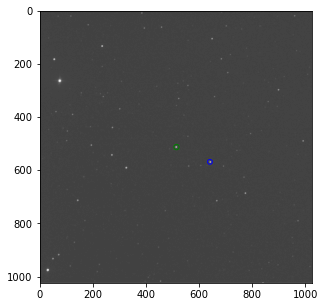

34 -


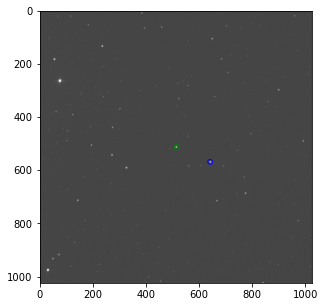

35 -


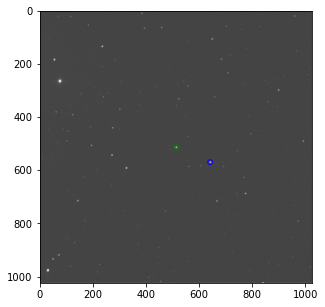

36 -


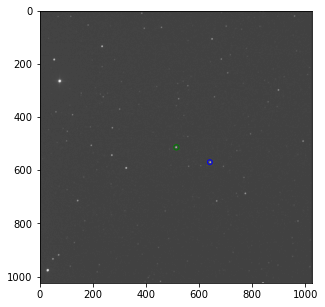

37 -


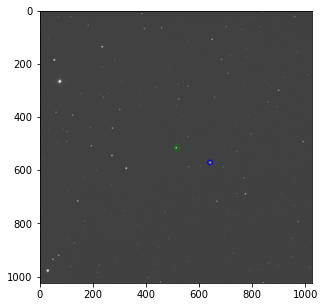

38 -


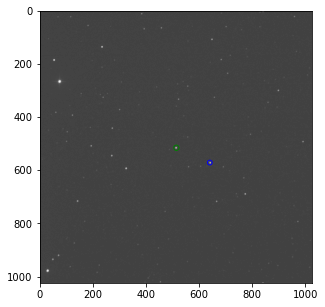

39 -


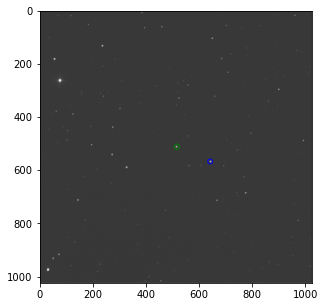

40 -


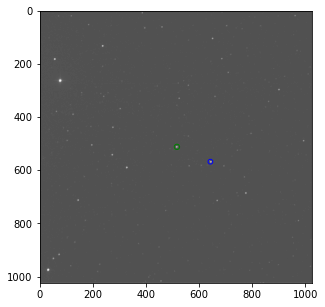

41 -


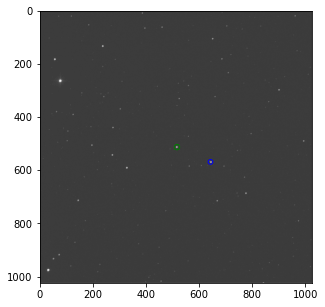

42 -


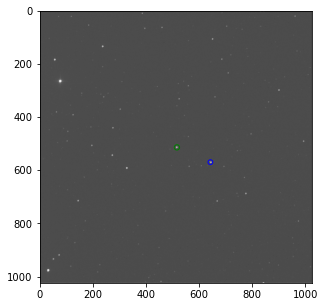

43 -


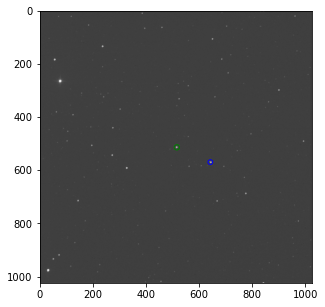

44 -


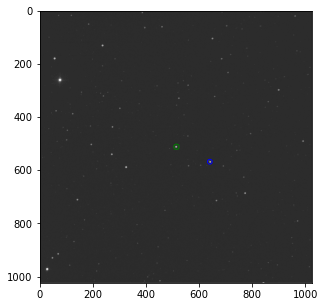

45 -


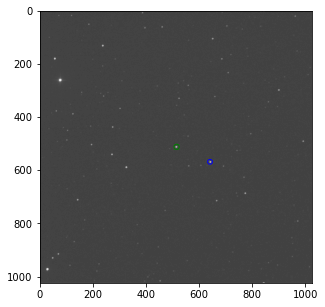

46 -


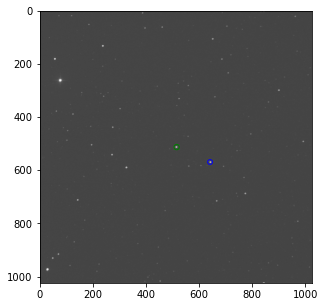

47 -


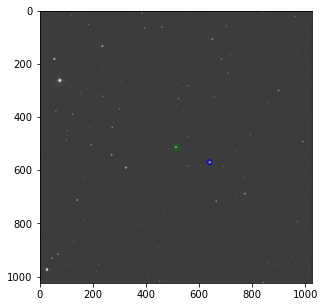

48 -


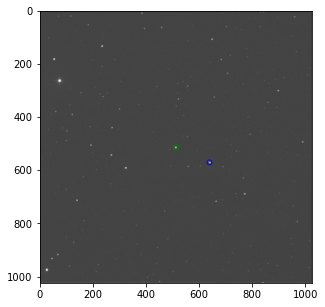

49 -


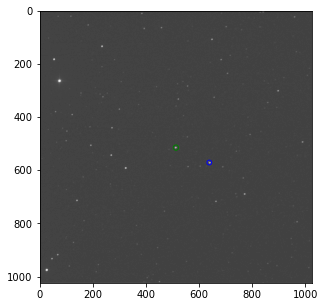

50 -


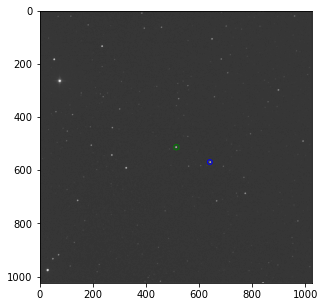

51 -


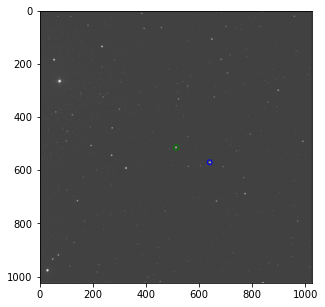

52 -


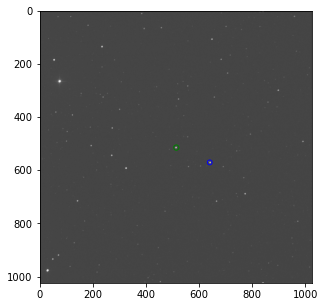

53 -


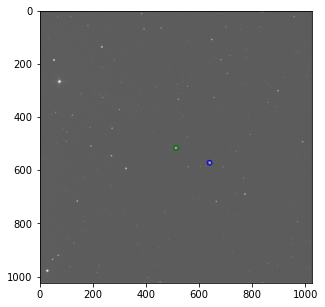

54 -


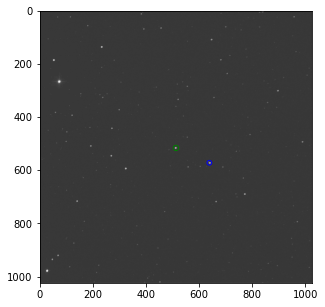

55 -


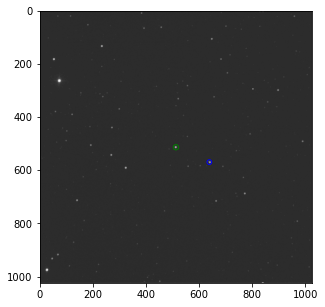

56 -


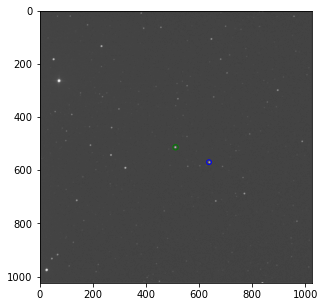

57 -


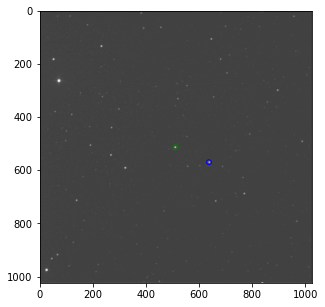

58 -


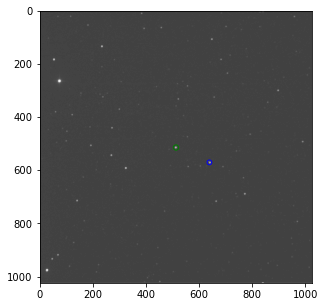

59 -


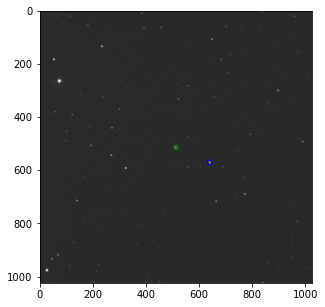

60 -


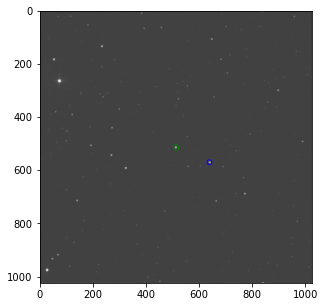

61 -


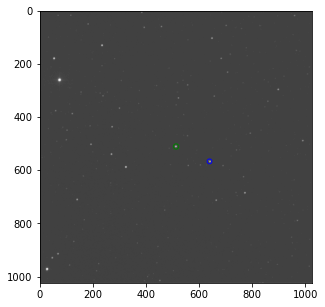

62 -


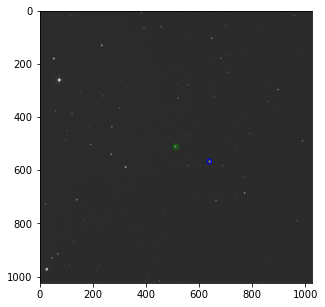

63 -


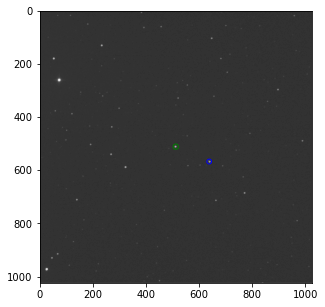

64 -


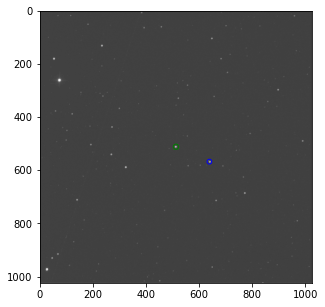

65 -


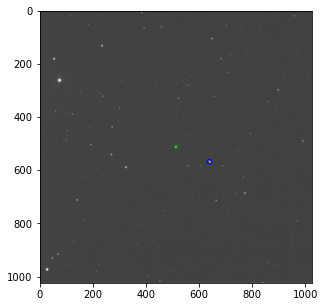

66 -


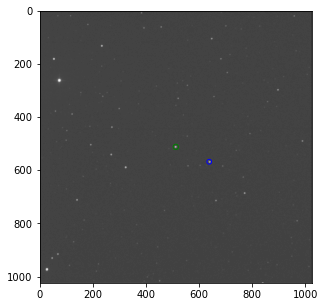

67 -


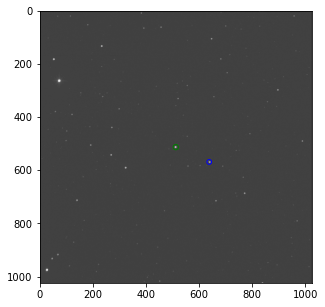

68 -


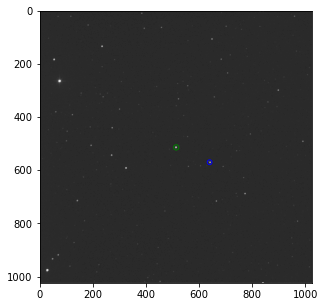

69 -


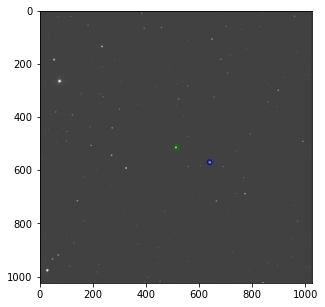

70 -


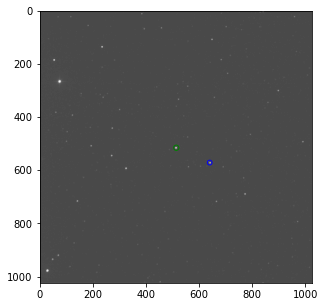

71 -


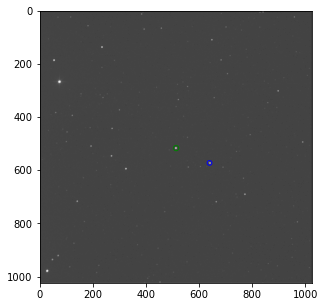

72 -


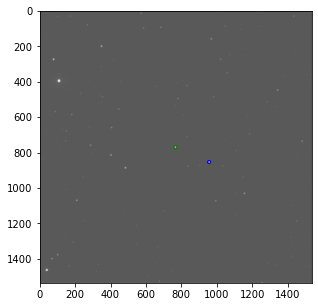

73 -


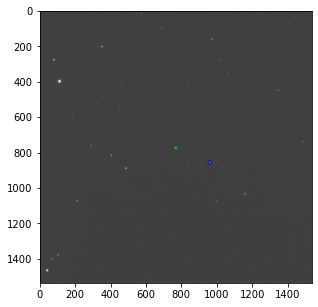

74 -


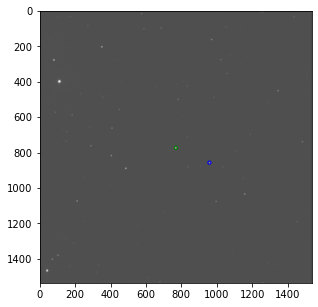

75 -


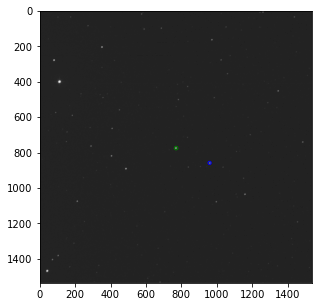

76 -


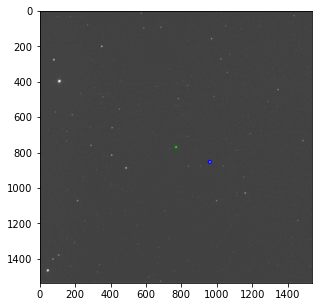

77 -


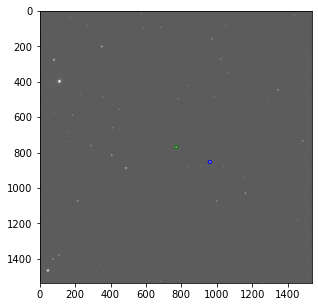

78 -


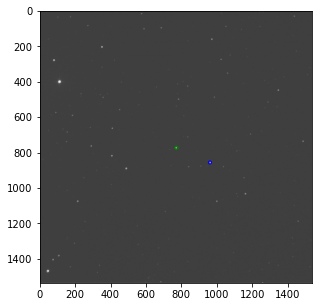

79 -


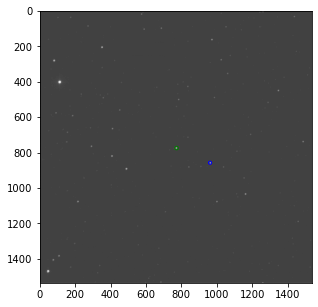

80 -


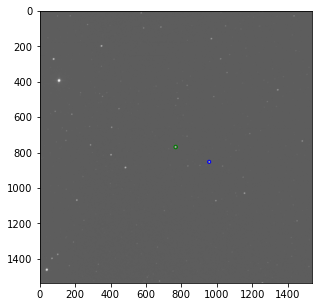

81 -


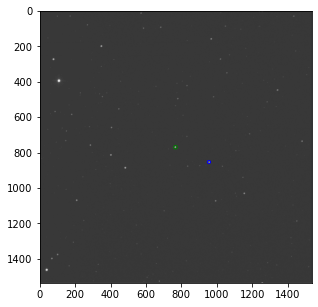

82 -


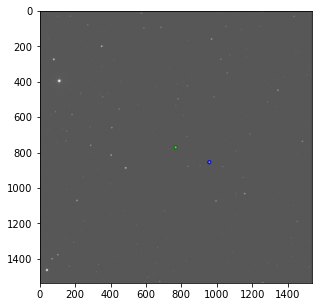

83 -


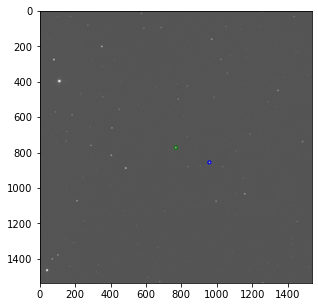

84 -


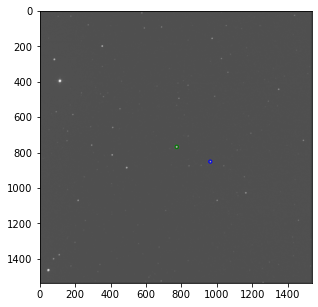

85 -


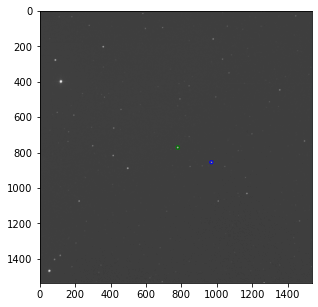

86 -


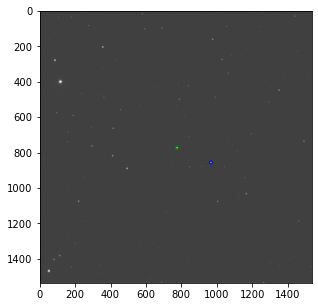

87 -


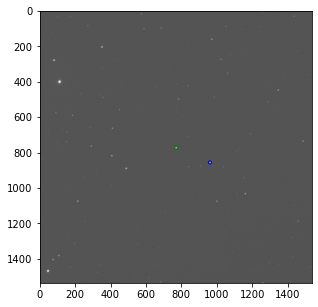

88 -


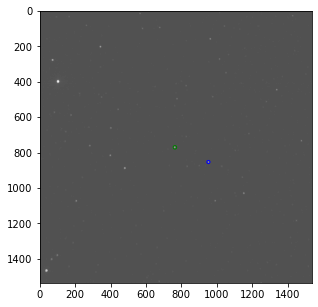

89 -


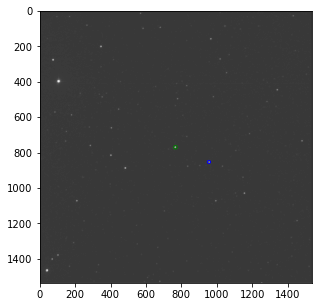

90 -


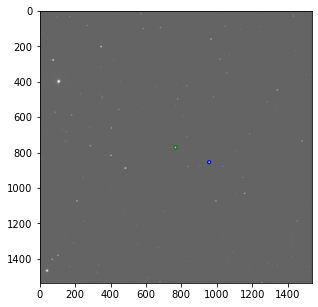

91 -


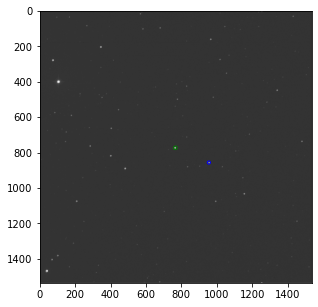

92 -


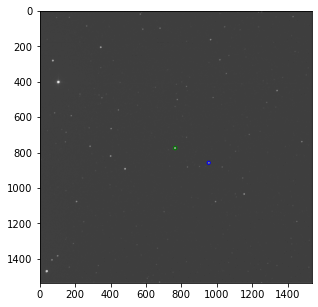

93 -


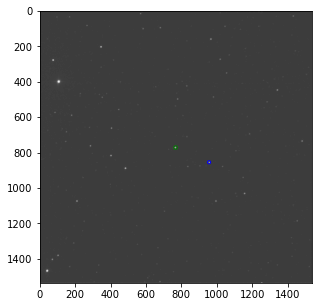

94 -


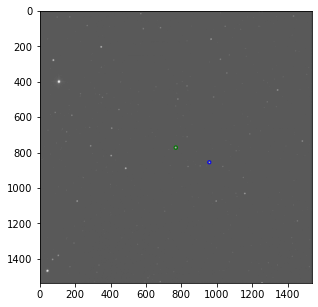

95 -


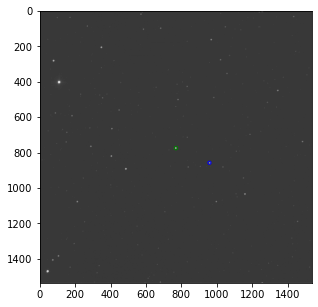

96 -


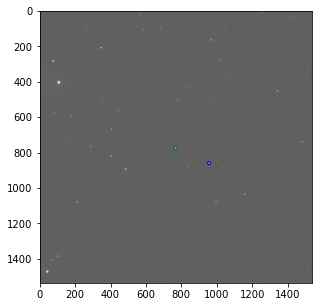

97 -


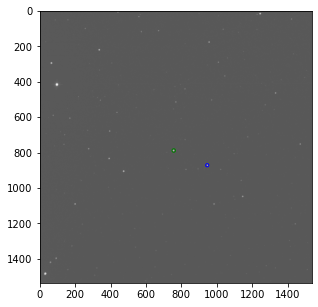

98 -


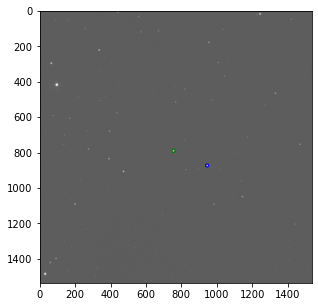

99 -


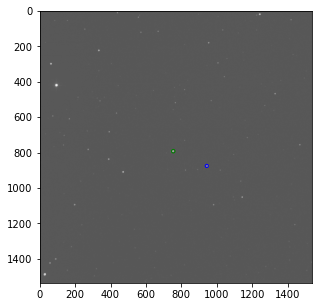

100 -


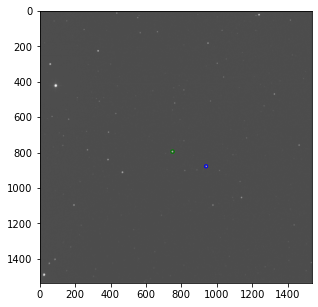

101 -


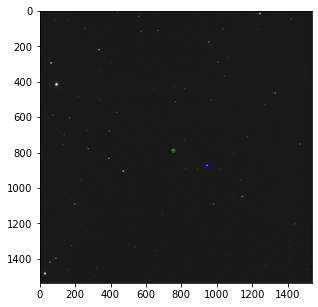

102 -


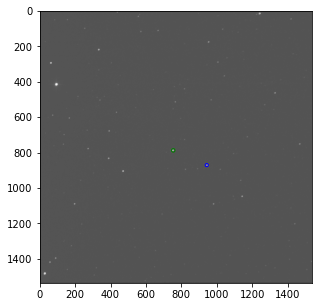

103 -


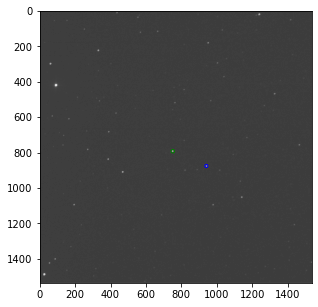

104 -


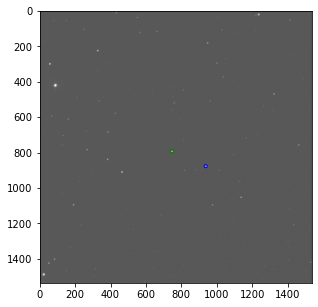

105 -


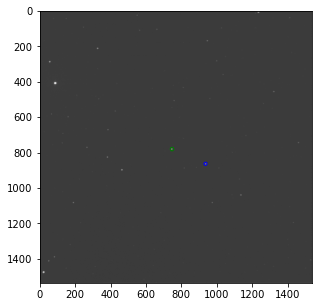

106 -


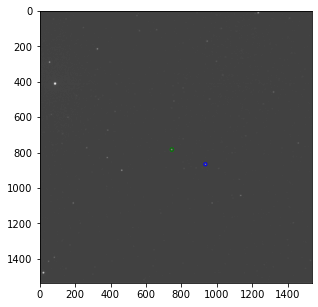

107 -


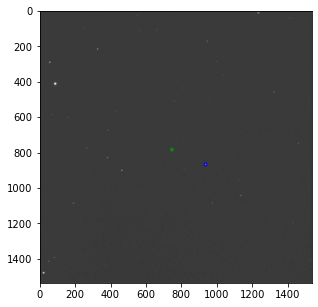

108 -


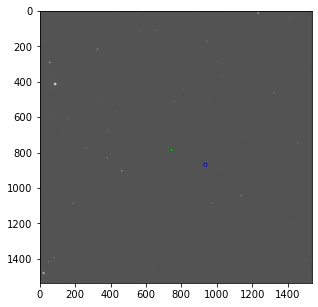

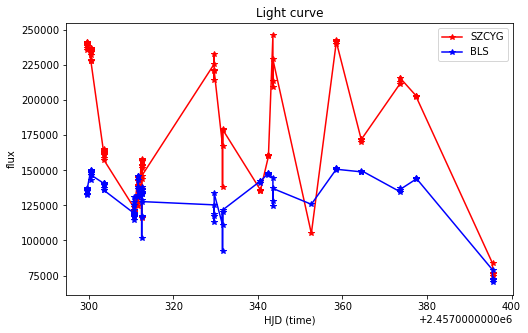

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import *
import photutils as ph
import numpy as np
import os.path
import csv
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import hstack
from astropy.nddata import CCDData
from astropy.coordinates import SkyCoord
from astropy.coordinates import SkyCoord
#from astropy.io.fits import HeaderDiff
import warnings

SZCYG_RA = (20, 32, 54) #Target Star
SZCYG_DEC = (46, 36, 4)
BCL_RA = (20, 32, 36.66) #Reference star (BCL)
BCL_DEC = (46, 34, 50.2)
m2 = 9.558
first_FITS = int(101296)
last_FITS = int(103633)
counterFit = 0
photo_array1 = []
photo_array2 = []
jd_array = []
SZCYG_MAG_LIST = []
units = ['hour', 'deg']
e = 0
warnings.filterwarnings('ignore', append = True)


while first_FITS <= last_FITS:
    
    fits_path = f'/Users/acrux2.0/Desktop/Project-1/New1/SZCYG-{first_FITS}-V.fits'
    
    if os.path.isfile(fits_path) == True:
        print(e,"-")
        first_FITS += 1
        counterFit += 1
        SZCYG = fits.open(fits_path)
        SZCYG_DATA = SZCYG[0].data
        SZCYG_pixel = SZCYG_DATA.shape
        SZCYG_header = SZCYG[0].header
        w = WCS(SZCYG_header)
        
        SZCYG_position = SkyCoord(SZCYG_RA, SZCYG_DEC, frame = "icrs", unit = units)
        BCL_position = SkyCoord(BCL_RA, BCL_DEC, frame = "icrs", unit = units)
        #warnings.filterwarnings('ignore', append = True)
        
        SZCYG_RA_DEG = SZCYG_position.ra.deg
        SZCYG_DEC_DEG = SZCYG_position.dec.deg
        BCL_RA_DEG = BCL_position.ra.deg
        BCL_DEC_DEG = BCL_position.dec.deg
        
        SZCYG_X, SZCYG_Y = w.wcs_world2pix(SZCYG_RA_DEG, SZCYG_DEC_DEG, 0)
        BCL_X, BCL_Y = w.wcs_world2pix(BCL_RA_DEG, BCL_DEC_DEG, 0)
        
        position = (SZCYG_X, SZCYG_Y)
        position2 = (BCL_X, BCL_Y)
        plt.figure(figsize = (5, 5))
        
        CA = ph.CircularAperture(position, r = 10.)
        AA = ph.CircularAnnulus(position, r_in = 20., r_out = 22.)
        
        #CA2 = ph.CircularAperture(position2, )
        #AA2 = ph.CircularAnnulus(position2, r_in = 20., r_out = 22.)
        
        CA2 = ph.CircularAperture(position2, r = 9.)
        AA2 = ph.CircularAnnulus(position2, r_in = 20., r_out = 22.)
        CA.plot(color = 'g', alpha = 1)
        CA2.plot(color = 'b', alpha = 1)
        
        rawflux_table = ph.aperture_photometry(SZCYG_DATA, CA)
        bkgflux_table = ph.aperture_photometry(SZCYG_DATA, AA)
        photo_table = hstack([rawflux_table, bkgflux_table], table_names = ['raw', 'bkg'])
        
        rawflux_table2 = ph.aperture_photometry(SZCYG_DATA, CA2)             
        bkgflux_table2 = ph.aperture_photometry(SZCYG_DATA, AA2)
        photo_table2 = hstack([rawflux_table2, bkgflux_table2], table_names=['raw', 'bkg'])
        
        final_sum = photo_table['aperture_sum_raw'] - (((photo_table['aperture_sum_bkg'])/(AA.area))*(CA.area))
        final_sum2 = photo_table2['aperture_sum_raw'] - (((photo_table2['aperture_sum_bkg'])/(AA.area))*(CA2.area))
        
        photo_table['residual_aperture_sum'] = final_sum
        photo_table2['residual_aperture_sum'] = final_sum2
        
        #print(photo_table['residual_aperture_sum'])
        #print(photo_table2['residual_aperture_sum'])
        photo_array1.append(photo_table['residual_aperture_sum'])
        photo_array2.append(photo_table2['residual_aperture_sum'])
        jd_array.append(SZCYG_header['JD'])
        
        SZCYG_MAG = (-2.5*np.log(float(final_sum)/float(final_sum2))) + m2
        SZCYG_MAG_LIST.append(SZCYG_MAG)
        
        plt.imshow(SZCYG_DATA, cmap = 'gray', norm = LogNorm())
        plt.show()
        e += 1
        
    else:
        first_FITS += 1
        
plt.figure(figsize = (8, 5))
plt.plot(jd_array, photo_array1, marker = '*', c = 'red')
plt.plot(jd_array, photo_array2, marker = '*', c = 'blue')
plt.xlabel("HJD (time)")
plt.ylabel("flux")
plt.title("Light curve")
plt.legend(['SZCYG', 'BLS'])
plt.savefig('LightCurve.png', dpi='figure',bbox_inches='tight')
plt.show()

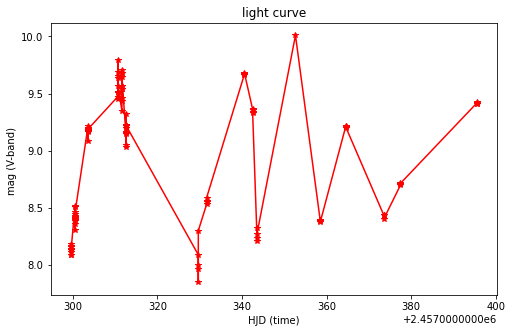

<Figure size 432x288 with 0 Axes>

In [3]:
plt.figure(figsize = (8, 5))
plt.plot(jd_array, SZCYG_MAG_LIST, marker = '*', c = 'red')
plt.xlabel("HJD (time)")
plt.ylabel("mag (V-band) ")
plt.title("light curve")
plt.show()
plt.savefig('LightCurve2.png', dpi='figure',bbox_inches='tight')

In [4]:
CSV=pd.DataFrame([jd_array,SZCYG_MAG_LIST]).transpose()
CSV.to_csv('timevsmag.csv',index=False,header=False)